In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [52]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class_labels'] 
df = pd.read_csv('/kaggle/input/flower/Iris Flower - Iris (1).csv', names=columns , header=50 )
df.head()

,Sepal length,Sepal width,Petal length,Petal width,class_labels
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In [53]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


/tmp/ipykernel_37/3819105403.py:7: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. 

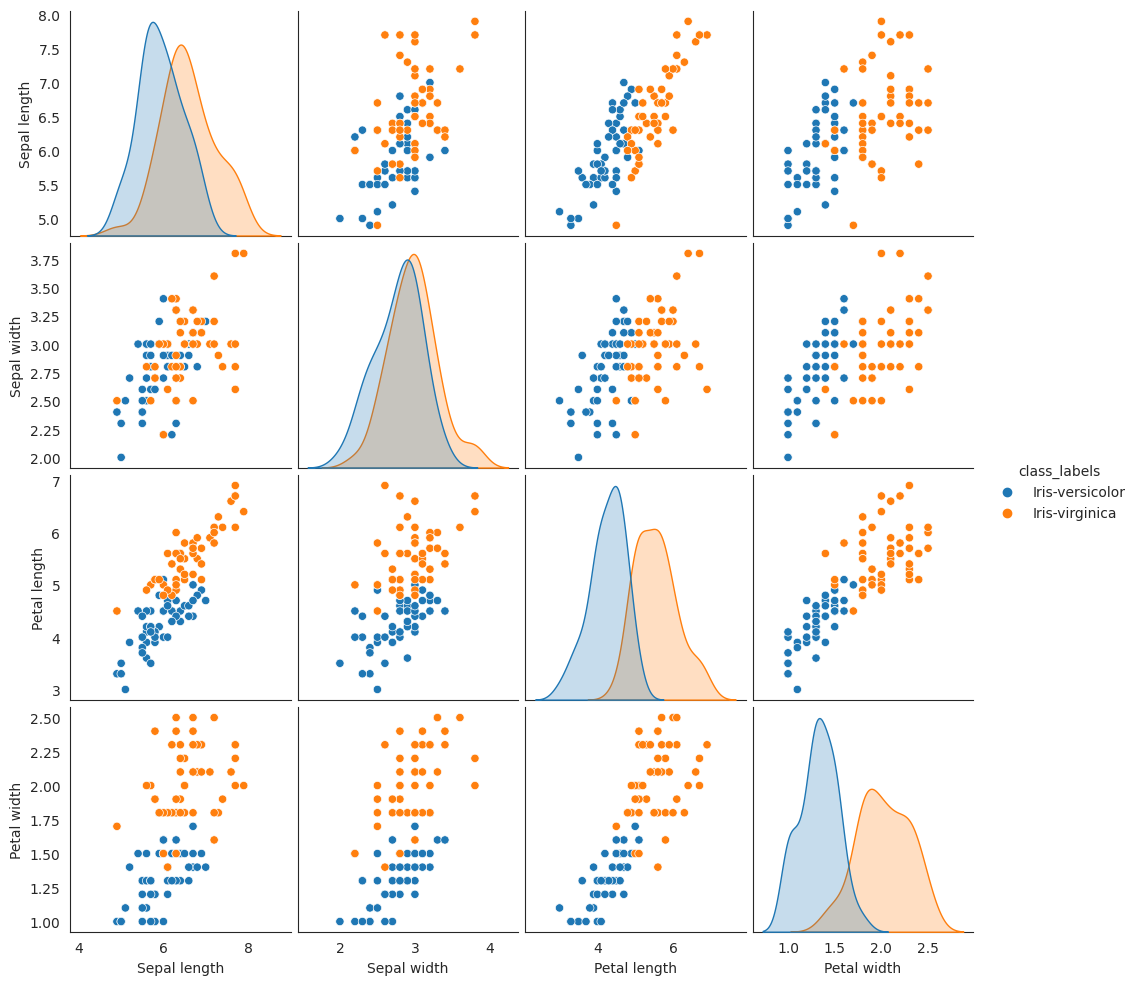

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set pandas option to treat infinite values as NaN
pd.set_option('mode.use_inf_as_na', True)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
df.dropna(inplace=True)

# Convert columns to float if not already
df['Sepal length'] = df['Sepal length'].astype(float)
df['Sepal width'] = df['Sepal width'].astype(float)
df['Petal length'] = df['Petal length'].astype(float)
df['Petal width'] = df['Petal width'].astype(float)

# Plot the pairplot
with sns.axes_style('white'):
    sns.pairplot(df, hue='class_labels')
plt.show()

In [55]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [56]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 2)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

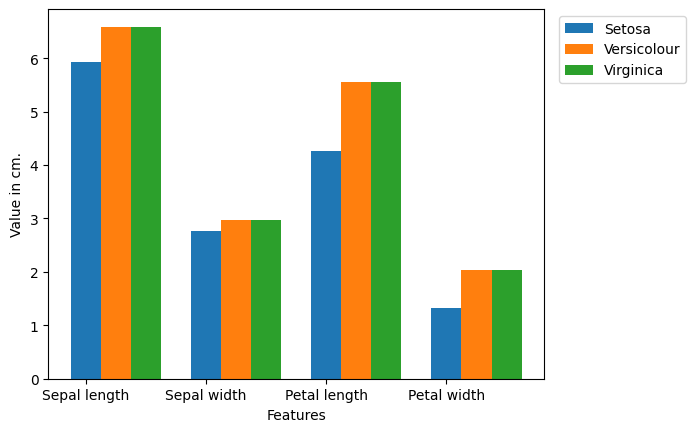

In [57]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[1], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [59]:
predictions = svn.predict(X_test)
accuracy_score(y_test, predictions)

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [60]:
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)